In [4]:
import pandas as pd
import numpy as np

In [5]:
# Optionally, save to CSV for later use
data = pd.read_csv('green transportation system.csv')
data.to_csv('green transportation system.csv', index=False)

In [6]:
data = pd.read_csv('green transportation system.csv')
data.head()

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
0,17.490802,106.046123,46.499916,2.095361,27.934722
1,29.014286,99.936814,19.225600,1.648231,15.689067
2,24.639879,76.423087,27.331985,2.911246,17.581553
3,21.973170,141.090001,43.164032,1.047446,20.840268
4,13.120373,121.493624,34.104467,1.969641,22.219200


In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Convert the scaled data into a DataFrame for easier analysis
scaled_data = pd.DataFrame(data_scaled, columns=data.columns)
# Display the standardized data
print(scaled_data.head())

   energy_efficiency  co2_emissions  electric_vehicle_penetration  \
0          -0.415900      -0.452465                      0.801884   
1           1.587377      -0.593258                     -1.100359   
2           0.826917      -1.135149                     -0.534981   
3           0.363328       0.355146                      0.569224   
4          -1.175669      -0.096466                     -0.062635   

   cost_efficiency  public_transport_usage  
0         0.482494               -0.684316  
1        -0.136414               -1.389866  
2         1.611824               -1.280827  
3        -0.968007               -1.093072  
4         0.308475               -1.013623  


In [8]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA()
# Fit PCA on the scaled data
pca.fit(data_scaled)
# Explained variance ratio for each principal component
print("Explained variance ratio for each principal component:")
print(pca.explained_variance_ratio_)
# Cumulative explained variance
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio for each principal component:
[0.20669281 0.20317681 0.2012694  0.19634014 0.19252083]

Cumulative explained variance:
[0.20669281 0.40986962 0.61113902 0.80747917 1.        ]


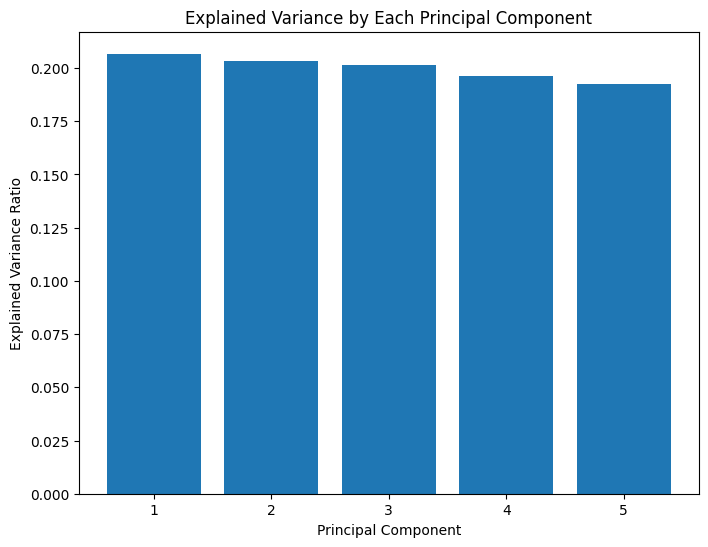

In [9]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

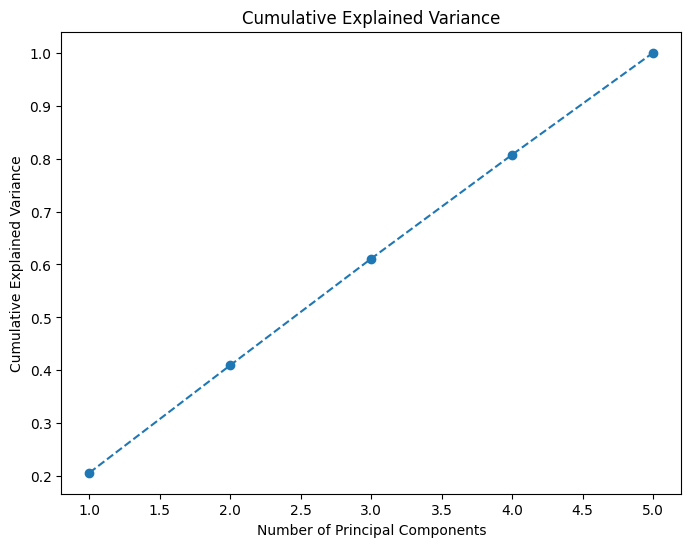

In [10]:
# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

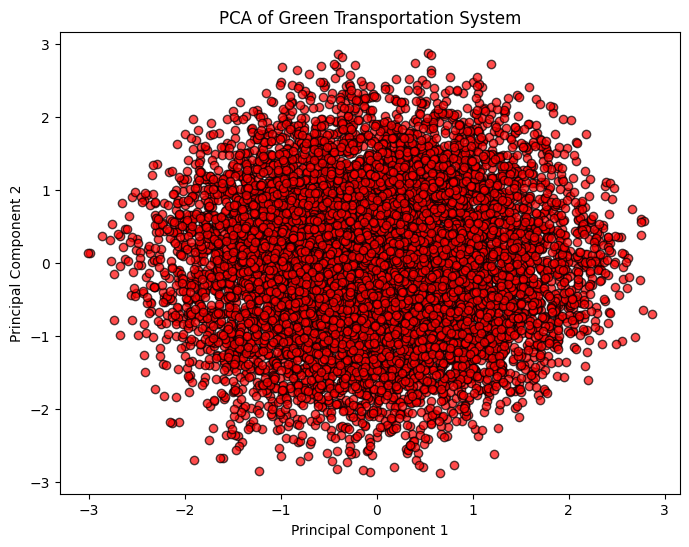

In [11]:
# Project the data onto the first two principal components
data_pca = pca.transform(data_scaled)
# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(data_pca[:, :2], columns=['PC1', 'PC2'])
# Visualize the data in 2D space using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='red', edgecolors='k', alpha=0.7)
plt.title('PCA of Green Transportation System')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()